# TP1 du module 5 : l'apprentissage supervisé

Dans ce TP, nous allons mettre en pratique les principes de l'apprentissage supervisé. Objectifs :
* Préparer des jeux de données pour l'apprentissage supervisé
* Entraîner un modèle d'arbre de décision
* Evaluer les performances d'un modèle de classification
* Entraîner et évaluer un modèle de régression

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Création de modèles de classification pour le Titanic

1. Commencez par recharger votre jeu de données sur le Titanic, à partir du csv que vous aviez enregistré à la fin du TP du module 4. Ainsi, vous obtenez un jeu de données déjà préparé pour l'apprentissage.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

2. Séparer vos données en mettant d'un côté les attributs, de l'autre la cible à prédire. Ensuite, séparer encore ces groupes entre entraînement et test (proportion de 0.2)

In [3]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

X = X.select_dtypes(include=["number"]).drop(columns=["PassengerId"], errors='ignore')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

X_train: (712, 5), X_test: (179, 5)
y_train: (712,), y_test: (179,)


3. Créez un arbre de décision, sans option particulière pour l'instant. Entraînez-le, puis évaluez-le à l'aide de l'accuracy, sur les jeux de données crées ci-dessus. Comparez ce score avec le score moyen obtenu en effectuant une validation croisée sur l'ensemble du jeu de données.

In [4]:
clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy sur l'entraînement : {acc_train:.3f}")
print(f"Accuracy sur le test : {acc_test:.3f}")

scores_cv = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(f"Accuracy moyenne en validation croisée : {scores_cv.mean():.3f}")

Accuracy sur l'entraînement : 0.958
Accuracy sur le test : 0.654
Accuracy moyenne en validation croisée : 0.642


4. Calculer également la précision et le rappel. Cherchez notamment dans la documentation comment indiquer laquelle des deux classes considérer comme la classe positive. Quelles observations pouvez-vous faire ?

In [5]:
precision = precision_score(y_test, y_pred_test, pos_label=1)
recall = recall_score(y_test, y_pred_test, pos_label=1)

print(f"Précision : {precision:.3f}")
print(f"Rappel    : {recall:.3f}")

Précision : 0.597
Rappel    : 0.500


**Observations :** il n'y a pas d'écart important entre accuracy, précision et rappel. Il semble donc qu'il n'y ait pas de déséquilibre notable au niveau des prédictions.

5. Afficher la matrice de confusion pour cet arbre de décision, sur le jeu de test. Commencez par simplement l'afficher de manière textuelle, puis travailler votre affichage à l'aide de matplotlib afin d'ajouter des couleurs relatives au nombre d'éléments dans chaque case de la matrice.

In [6]:
cm = confusion_matrix(y_test, y_pred_test)

print("Matrice de confusion (brute) :")
print(cm)

Matrice de confusion (brute) :
[[80 25]
 [37 37]]


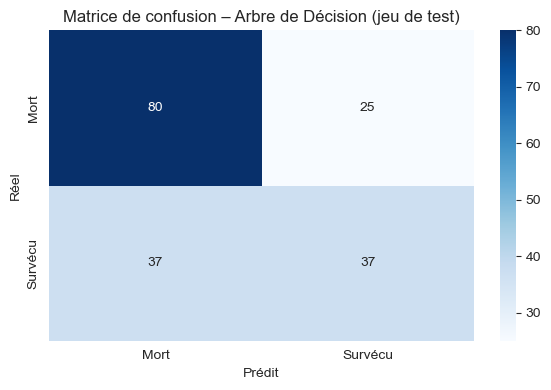

In [7]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, xticklabels=["Mort", "Survécu"], yticklabels=["Mort", "Survécu"])

plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion – Arbre de Décision (jeu de test)")
plt.tight_layout()
plt.show()

6. Quelle est la profondeur de l'arbre de décision que vous avez créé ?

In [8]:
profondeur = clf.get_depth()
print(f"Profondeur de l'arbre : {profondeur}")

Profondeur de l'arbre : 27


7. Créer un deuxième arbre de décision, en limitant sa profondeur à trois niveaux. Affichez son accuracy sur les données de test : que constatez-vous, et comment pouvez-vous l'expliquer ?

In [9]:
clf_depth3 = DecisionTreeClassifier(max_depth=3, random_state=42)

clf_depth3.fit(X_train, y_train)

y_pred_test_depth3 = clf_depth3.predict(X_test)

acc_test_depth3 = accuracy_score(y_test, y_pred_test_depth3)
print(f"Accuracy sur le test (profondeur 3) : {acc_test_depth3:.3f}")

Accuracy sur le test (profondeur 3) : 0.704


**Observation :** en limitant la profondeur de l'arbre, le score augmente. Cela est du au fait que limiter la profondeur de l'arbre permet d'éviter un phénomène de surapprentissage.

8. Visualisez ce nouvel arbre de décision : prenez garde à bien faire apparaître les labels du jeu de données, et remplacez les valeurs 0 et 1 par des labels textuels de votre choix (ex : 'Died' et 'Survived'). Quelles observations pouvez-vous faire sur cet arbre ? Les décisions vous paraissent-elles cohérentes avec l'analyse des données faites dans le module 4 ?

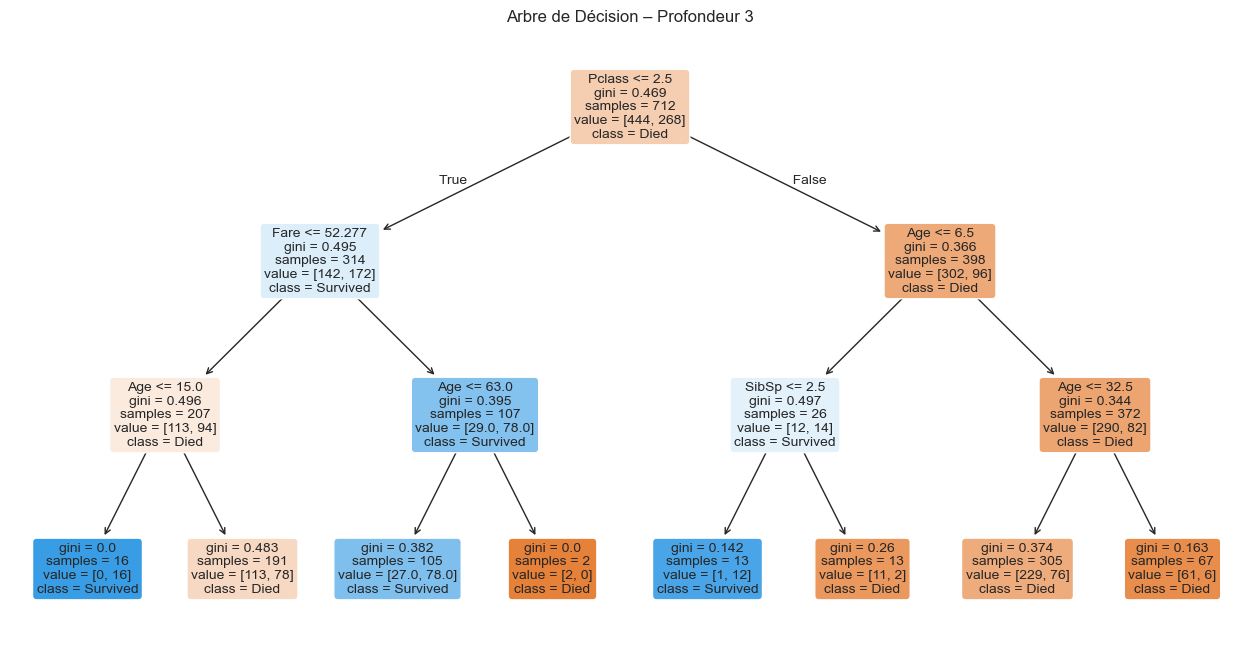

In [10]:
feature_names = X.columns.tolist()

class_names = ['Died', 'Survived']

plt.figure(figsize=(16, 8))
plot_tree(
    clf_depth3,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Arbre de Décision – Profondeur 3")
plt.show()

9. Vous allez à présent comparer les performances d'arbre de profondeurs différentes. Créez différents arbre, en faisant varier la profondeur entre 1 et la profondeur trouvée à la question 6. Pour chaque arbre, calculer son score (accuracy) à l'aide d'une validation croisée à 5 feuilles. Sur un graphique, représentez l'évolution du score en fonction de la profondeur de l'arbre. 
Affichez également la profondeur pour lequel le score est maximal.
Qu'observez-vous ?

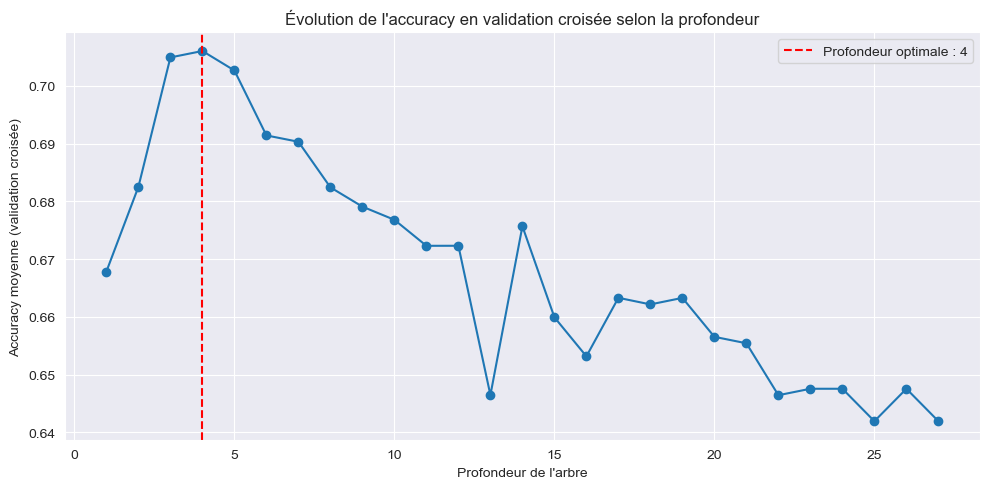

Profondeur optimale : 4 (Accuracy moyenne = 0.706)


In [11]:
max_depth_found = clf.get_depth()

depths = list(range(1, max_depth_found + 1))
mean_scores = []

for d in depths:
    clf_temp = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(clf_temp, X, y, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

best_score = max(mean_scores)
best_depth = depths[np.argmax(mean_scores)]

plt.figure(figsize=(10, 5))
plt.plot(depths, mean_scores, marker='o')
plt.axvline(best_depth, color='red', linestyle='--', label=f"Profondeur optimale : {best_depth}")
plt.title("Évolution de l'accuracy en validation croisée selon la profondeur")
plt.xlabel("Profondeur de l'arbre")
plt.ylabel("Accuracy moyenne (validation croisée)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Profondeur optimale : {best_depth} (Accuracy moyenne = {best_score:.3f})")

**Observation :** au départ, le score augmente avec la profondeur. Avec une profondeur trop basse, on a du sous-apprentissage. Mais ensuite, le score diminue alors que la profondeur augmente : on bascule dans du sur-apprentissage. Une profondeur de 5 semble donner les meilleurs résultats.

10. Comparez deux critères pouvant être utilisé pour constuire l'arbre de décision : coefficient de gini et mesure d'entropie. Pour la profondeur de l'arbre,
Avec un validation croisée, affichez sur un histogramme les trois valeurs moyennes obtenues. Voyez-vous un critère qui se détache des autres par ses performances ?

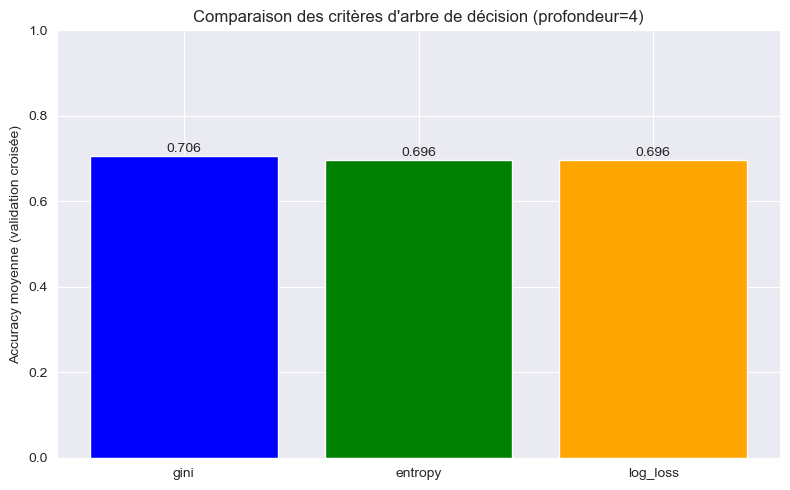

In [12]:
criteria = ['gini', 'entropy', 'log_loss']  # 'log_loss' est disponible à partir de sklearn 1.0

# Profondeur optimale (issue de la question 9)
best_depth = best_depth  # récupérée avant

mean_scores = []

for crit in criteria:
    clf = DecisionTreeClassifier(criterion=crit, max_depth=best_depth, random_state=42)
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

# Affichage histogramme
plt.figure(figsize=(8,5))
plt.bar(criteria, mean_scores, color=['blue', 'green', 'orange'])
plt.ylabel("Accuracy moyenne (validation croisée)")
plt.title(f"Comparaison des critères d'arbre de décision (profondeur={best_depth})")
plt.ylim(0, 1)
for i, score in enumerate(mean_scores):
    plt.text(i, score + 0.01, f"{score:.3f}", ha='center')
plt.tight_layout()
plt.show()

**Observations :** les performances des deux modèles ne présentent pas de différence pour le jeu de données du Titanic.

## Créer un modèle de regression

Pour tester le concept de modèle de régression, nous ne pouvons pas utiliser le jeu de données sur le Titanic. A la place, nous allons nous intéresser à un jeu de données présentant l'évolution de la maladie chez des patients diabétiques. L'objectif sera de prédire l'évolution de la maladie en un an, en se basant sur des données mesurées un an avant. Ce jeu de données est directement disponible via la librairie scikit-learn. Documentation : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html

1. Commencez par charger les données dans deux dataframe : un pour les attributs, un pour la cible à prédire.

In [13]:
diabetes = load_diabetes()

X_diabetes = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

y_diabetes = pd.DataFrame(diabetes.target, columns=['disease_progression'])

print("Dimensions des attributs :", X_diabetes.shape)
print("Dimensions de la cible :", y_diabetes.shape)

Dimensions des attributs : (442, 10)
Dimensions de la cible : (442, 1)


2. Affichez les premières lignes des attributs. Avez-vous bien repéré contenant la valeur à prédire ?

In [14]:
print("Premières lignes des attributs :")
display(X_diabetes.head())

print("Premières lignes de la variable cible (progression de la maladie) :")
display(y_diabetes.head())

Premières lignes des attributs :


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Premières lignes de la variable cible (progression de la maladie) :


,disease_progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


3. Commencez par effectuer une régression linéaire, en prenant bien soin d'avoir des données d'entraînement et de test. Quelle erreur quadratique moyenne obtenez-vous ? Comment analysez-vous ce résultat ?

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X_diabetes, y_diabetes, test_size=0.2, random_state=42
)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Erreur quadratique moyenne (MSE) sur le test : {mse:.3f}")

Erreur quadratique moyenne (MSE) sur le test : 2900.194


4. Faites une représentation graphique des données réelles par rapport aux données prédites par le modèle : pour chaque attribut, représentez graphiquement les valeurs sur l'abscisse, et l'évolution de la maladie (réelle et prédite) sur les ordonnées. Colorez différement les données en fonction de si elles sont réelles ou prédites.

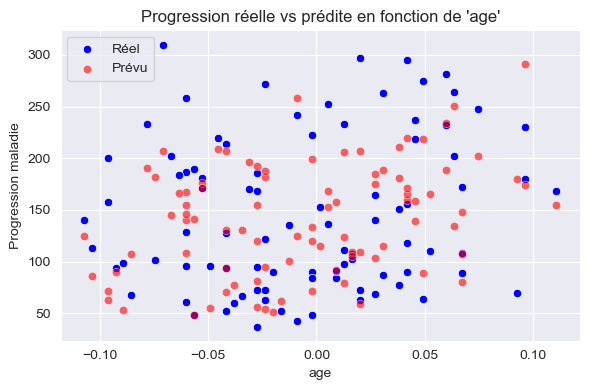

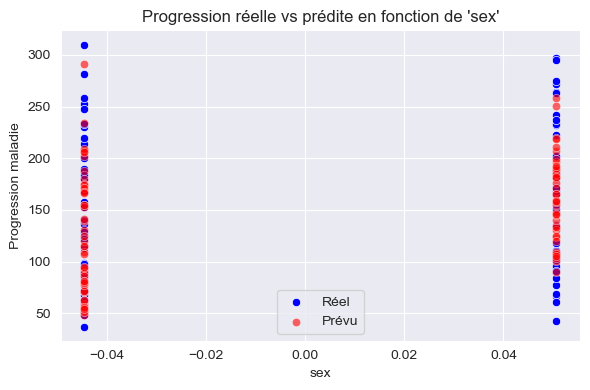

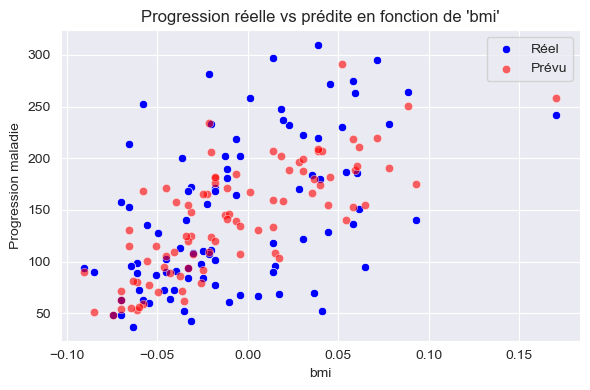

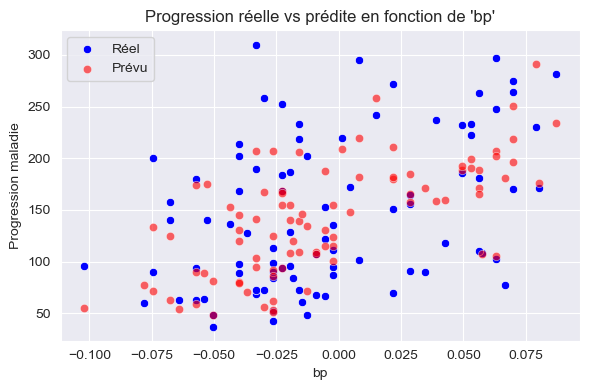

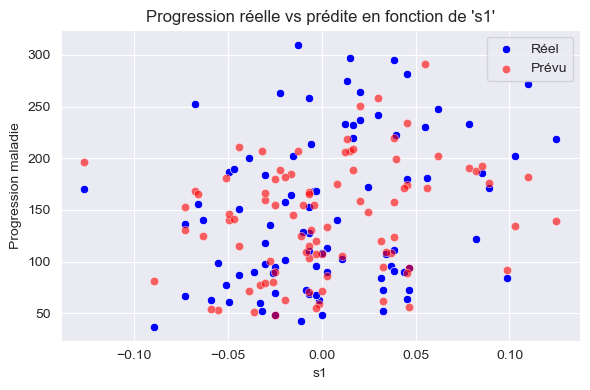

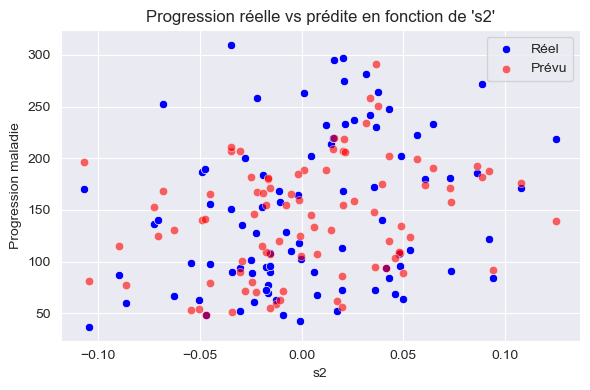

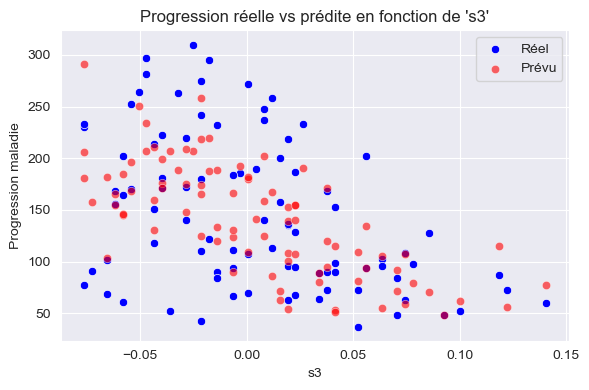

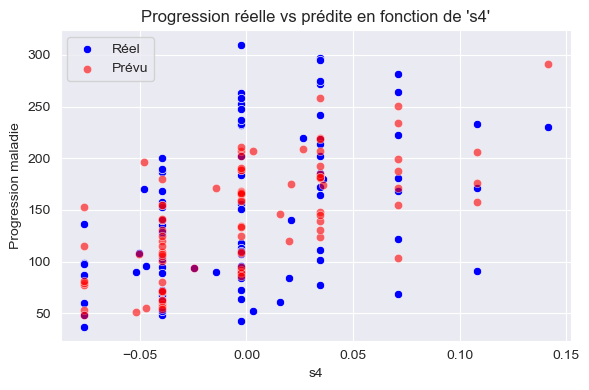

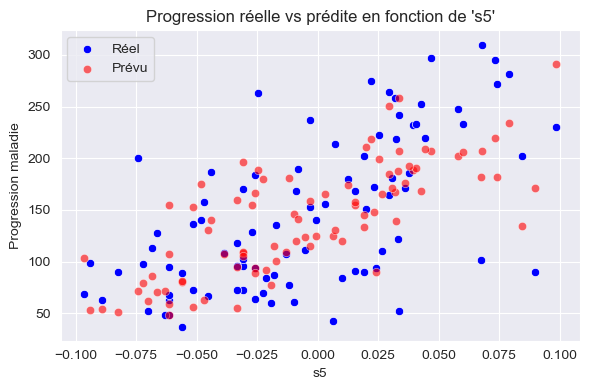

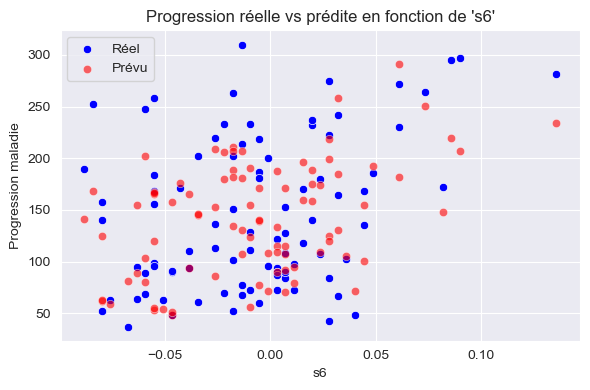

In [16]:
df_plot = pd.DataFrame()

for feature in X_diabetes.columns:
    plt.figure(figsize=(6, 4))

    sns.scatterplot(x=X_test[feature], y=y_test.values.flatten(), label='Réel', color='blue')

    sns.scatterplot(x=X_test[feature], y=y_pred.flatten(), label='Prévu', color='red', alpha=0.6)

    plt.xlabel(feature)
    plt.ylabel('Progression maladie')
    plt.title(f"Progression réelle vs prédite en fonction de '{feature}'")
    plt.legend()
    plt.tight_layout()
    plt.show()

5. Sur un seul graphe, affichez les valeurs prédites en fonction des valeurs réelles. Tracez également la droite d'équation y=x. Quelles observations faites-vous ?

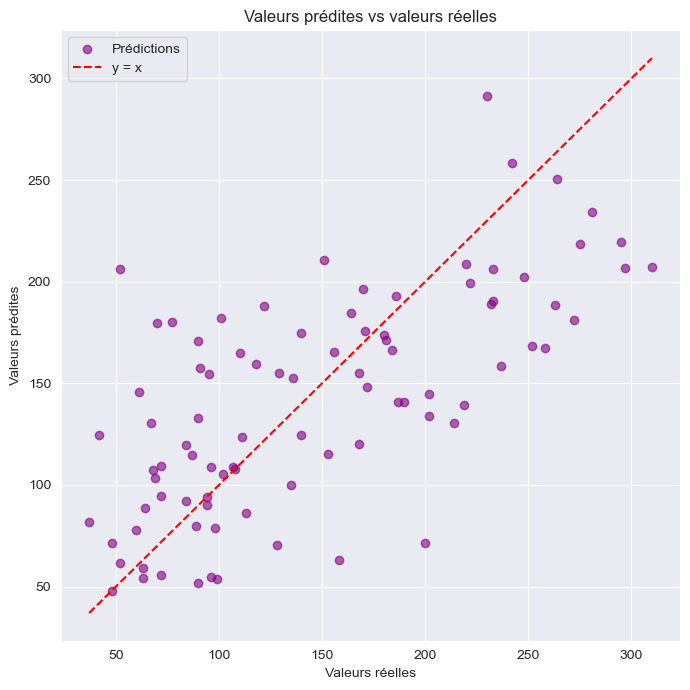

In [17]:
plt.figure(figsize=(7, 7))

y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

plt.scatter(y_test_flat, y_pred_flat, alpha=0.6, color='purple', label='Prédictions')

lims = [min(y_test_flat.min(), y_pred_flat.min()), max(y_test_flat.max(), y_pred_flat.max())]
plt.plot(lims, lims, 'r--', label='y = x')

plt.xlabel('Valeurs réelles')
plt.ylabel('Valeurs prédites')
plt.title('Valeurs prédites vs valeurs réelles')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

6. Pour une régression linéaire, les valeurs sur les attributs sont cruciales. Par défaut lorsque vous avez chargé vos données avec Scikit-learn, celles-ci était normalisées. Rechargez-les en ajoutant l'option pour obtenir les données brutes. Affichez les premières lignes du dataset pour constater les différences de plage de valeurs.

In [18]:
diabetes = load_diabetes()

X_raw = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.DataFrame(diabetes.target, columns=['disease_progression'])

scaler = StandardScaler()
X_normalized = pd.DataFrame(scaler.fit_transform(X_raw), columns=diabetes.feature_names)

print("Données brutes (non normalisées) :")
display(X_raw.head())

print("Données normalisées (manuellement) :")
display(X_normalized.head())


Données brutes (non normalisées) :


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Données normalisées (manuellement) :


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


7. Réentraînez un modèle de régression linéaire sur ces données non normalisées? Que constatez-vous ?

In [19]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

lr_raw = LinearRegression()
lr_raw.fit(X_train_raw, y_train)

y_pred_raw = lr_raw.predict(X_test_raw)

mse_raw = mean_squared_error(y_test, y_pred_raw)
print(f"Erreur quadratique moyenne (MSE) sur données non normalisées : {mse_raw:.3f}")

Erreur quadratique moyenne (MSE) sur données non normalisées : 2900.194


8. Proposez des modèles de régression polynomiale : tester plusieurs degrés de polynôme, entre 1 et 20. Pour chacun, calculez le score obtenu, et affichez-le. Représentez graphiquement l'évolution de l'erreur quadratique moyenne en fonction du degré du polynome.
**Attention :** pour cet partie, réfléchissez aux données que vous voulez utiliser : normalisées ou non ?

Degré 1 : MSE = 2900.194
Degré 2 : MSE = 3096.028
Degré 3 : MSE = 91610.347
Degré 4 : MSE = 148326.395
Degré 5 : MSE = 178237.455
Degré 6 : MSE = 368327.844
Degré 7 : MSE = 1520320.169
Degré 8 : MSE = 8415169.122
Degré 9 : MSE = 28341041.386
Degré 10 : MSE = 336353404.288


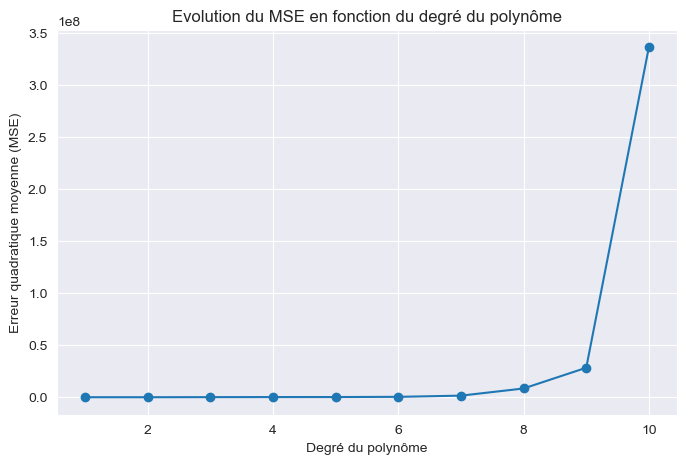

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

degrees = range(1, 11)
mse_list = []

for degree in degrees:
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_pred = model.predict(X_test_poly)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)
    print(f"Degré {degree} : MSE = {mse:.3f}")

plt.figure(figsize=(8,5))
plt.plot(degrees, mse_list, marker='o')
plt.xlabel('Degré du polynôme')
plt.ylabel('Erreur quadratique moyenne (MSE)')
plt.title('Evolution du MSE en fonction du degré du polynôme')
plt.grid(True)

Constatez-vous une différence avec la régression linéaire simple ?

## Régression avec un arbre de décision

Il est aussi possible d'utiliser les arbres de décision pour construire un modèle de régression. En utilisant la classe adéquate de scikit-learn, proposez un arbre de régression sur le jeu de données du diabètes. Prenez soin d'analyser la profondeur de l'arbre, afin de choisir celle qui vous parait la plus pertinente. Affichez l'arbre obtenant le meilleur score.

Comparez les résultats obtenus avec ceux de la régression linéaire et de la régression polynomiale.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Régression linéaire – MSE : {mse_lr:.3f}")

Régression linéaire – MSE : 2900.194


In [ ]:
best_mse_poly = float('inf')
best_deg_poly = None

for degree in range(1, 21):
    poly = PolynomialFeatures(degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model_poly = LinearRegression()
    model_poly.fit(X_train_poly, y_train)
    y_pred_poly = model_poly.predict(X_test_poly)

    mse_poly = mean_squared_error(y_test, y_pred_poly)
    if mse_poly < best_mse_poly:
        best_mse_poly = mse_poly
        best_deg_poly = degree

print(f"Régression polynomiale (degré {best_deg_poly}) – MSE : {best_mse_poly:.3f}")

In [21]:
best_mse_tree = float('inf')
best_depth_tree = None

for depth in range(1, 21):
    model_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    model_tree.fit(X_train, y_train)
    y_pred_tree = model_tree.predict(X_test)

    mse_tree = mean_squared_error(y_test, y_pred_tree)
    if mse_tree < best_mse_tree:
        best_mse_tree = mse_tree
        best_depth_tree = depth

print(f"Arbre de décision (profondeur {best_depth_tree}) – MSE : {best_mse_tree:.3f}")

Arbre de décision (profondeur 5) – MSE : 3545.410
